In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
Q_ID = 2 #1,9,12,13,14,15,16,17,18,20,22,24,25,27,43,46

df_csv = pd.read_csv('/Users/apple/Desktop/deep_eye/dataset/input_data.csv',usecols=['participant_ID','Q_ID','text','fixation1'])
df_csv = df_csv[(df_csv['Q_ID'] == Q_ID)]
df_csv = df_csv.drop(['Q_ID'],axis=1)
df_csv

,participant_ID,text,fixation1
26,1,沙罐,0
27,1,置入,0
28,1,不同,1
29,1,濃度,1
30,1,鹽水,1
...,...,...,...
72088,60,所,0
72089,60,受,1
72090,60,浮力,1
72091,60,愈,0


In [81]:
total_Q_df = pd.DataFrame()
for p in range(61):
    df = df_csv[df_csv['participant_ID'] == p].fixation1.reset_index(drop = True)
    total_Q_df = pd.concat([total_Q_df, df], axis = 1)
total_Q_df = total_Q_df.iloc[:,1:]
total_Q_df

,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,...,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1,fixation1
0,0,1,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
1,0,1,0,1,0,1,1,0,0,1,...,0,1,1,1,1,1,1,0,0,1
2,1,1,0,1,0,1,1,0,0,1,...,0,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,0,0,1,...,0,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,1,1,...,0,0,1,1,1,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0,1
8,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [82]:
A_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/A_P1_answer.csv")
C_answer = pd.read_csv("/Users/apple/Desktop/deep_eye/dataset/answer/C_P1_answer.csv")

total_Q_df.loc['answer'] = A_answer['1'].append(C_answer['1']).values # add answer row
total_Q_df.columns = ["P_"+str(i) for i in list(range(1,61))]
df = total_Q_df.T
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,answer
P_1,0,0,1,1,1,0,0,0,1,0,...,1,1,1,0,0,0,1,1,1,0
P_2,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
P_3,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
P_4,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
P_5,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
P_6,0,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
P_7,1,1,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
P_8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,1
P_9,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0
P_10,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split

x_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=816) # y_df.astype('int')

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 28)
(15, 28)
(45,)
(15,)


---

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

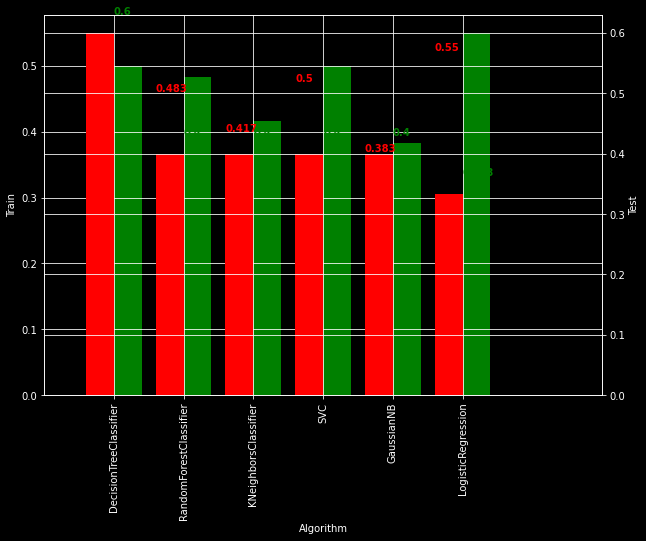

,Algorithm
Score,
0.600000,DecisionTreeClassifier
0.400000,RandomForestClassifier
0.400000,KNeighborsClassifier
0.400000,SVC
0.400000,GaussianNB
0.333333,LogisticRegression


In [86]:
# warnings.filterwarnings('ignore')
# Baseline - comparing model accuracy using all features across classifiers 
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression()
    ]


# Train Accuracy
algo_train = []
scores_train = []
for clf in classifiers:
    algo_train.append(clf.__class__.__name__)
    scores_train.append(cross_val_score(clf, x_df, y_df.astype('int'), cv=5).mean())
# warnings.filterwarnings('ignore')
score_df_Train = pd.DataFrame({'Algorithm': algo_train, 'Score': scores_train}).set_index('Algorithm')


# Test Accuracy
algo_test = []
scores_test = []

for clf in classifiers:
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    algo_test.append(clf.__class__.__name__)
    scores_test.append(accuracy_score(y_test, y_pred))
# warnings.filterwarnings('ignore')
score_df_Test  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test}).set_index('Algorithm')

# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(10,7)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .4

score_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
score_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)
ax.grid(None, axis='both')
ax2.grid(None)
ax.set_ylabel('Train')
ax2.set_ylabel('Test')
ax.set_xlim(-1,7)

scores_train_round = np.round(scores_train,3)
scores_test_round = np.round(scores_test,3)
for index,data in enumerate(scores_train_round):
    plt.text(x=index-.4 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10), color='red', fontweight='bold')
for index,data in enumerate(scores_test_round):
    plt.text(x=index , y =data+.03 , s=f"{data}" , fontdict=dict(fontsize=10), color='green', fontweight='bold')

plt.show()

# Table
score_df_Test_table  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test})
result_df = score_df_Test_table.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


In [96]:
from xgboost import XGBClassifier


xgboostModel = XGBClassifier(n_estimators=1000, learning_rate= 0.3)

xgboostModel.fit(x_train, y_train)

predicted = xgboostModel.predict(x_test)

# # 預測成功的比例
# print('訓練集: ',xgboostModel.score(x_train,y_train))
print('測試集: ',xgboostModel.score(x_test,y_test))

[14:30:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
測試集:  0.3333333333333333


In [94]:
predicted

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [95]:
y_test

P_24    0
P_58    0
P_33    1
P_32    0
P_6     0
P_54    1
P_4     1
P_8     1
P_11    0
P_26    0
P_55    0
P_34    0
P_50    0
P_18    0
P_3     1
Name: answer, dtype: int64

In [70]:
clf = KNeighborsClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [72]:
y_test

P_24    0
P_58    0
P_33    1
P_32    0
P_6     0
P_54    1
P_4     1
P_8     1
P_11    0
P_26    0
P_55    0
P_34    0
P_50    0
P_18    0
P_3     1
Name: answer, dtype: int64

In [14]:
# df1 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_fix_level.csv')
# df1 = df1.drop(df1.columns[[0]], axis=1)
# df2 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_reg_level.csv')
# df2 = df2.drop(df2.columns[[0]], axis=1)
# df3 = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_sac_level.csv')
# df3 = df3.drop(df3.columns[[0]], axis=1)

# ans = pd.read_csv('/Users/apple/Desktop/202108eyeml/P5/P5/answercheck_A_P5.csv')
# ans = ans.drop(ans.columns[0], axis = 1)
# ans = np.array(ans).reshape(1410, 1)
# ans_df = pd.DataFrame(ans)
# ans_df.columns = ['ans']

# QCP_combine = pd.concat([df1, df2, df3, ans_df],axis = 1)
# QCP_combine.dropna(inplace= True)# drop na
# # QCP_combine.to_csv('/Users/apple/Desktop/202108eyeml/A/P5/P5_all_level.csv')
# QCP_combine

In [25]:
QCP_combine = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/AP1_check/QCP_count_duration_ans/QCP_combine.csv')
seq = pd.read_csv('/Users/apple/Desktop/pre/result.csv')
seq = seq.drop(seq.columns[0], axis = 1)
QCP_combine = QCP_combine.drop(QCP_combine.columns[0], axis = 1)
QCP_combine = QCP_combine.iloc[:,[3, 4, 5, 6]]

QCP_combine = QCP_combine.drop([QCP_combine.index[964], QCP_combine.index[978]])
QCP_combine = pd.concat([QCP_combine, seq],axis = 1)
QCP_combine.dropna(inplace= True)
QCP_combine

,QAOI_duration,CAOI_duration,PAOI_duration,answer,[1],"[1, 2]","[1, 2, 1]","[1, 2, 1, 2]","[1, 2, 3]","[1, 2, 3, 1]",...,"[3, 1, 2, 3]","[3, 1, 3]","[3, 1, 3, 1]","[3, 2]","[3, 2, 1]","[3, 2, 1, 2]","[3, 2, 1, 3]","[3, 2, 3]","[3, 2, 3, 1]","[3, 2, 3, 2]"
0,2628.0,4083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109.0,5497.0,465.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4836.0,1882.0,2542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,3536.0,679.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2875.0,2898.0,1432.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2747.0,585.0,2481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,1894.0,211.0,353.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,4026.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,2085.0,1164.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# nofsequence = pd.read_csv('/Users/apple/Desktop/202108eyeml/A/AP1_check/P1_sequential_numberofsequence_beforemerge_updown.csv')
# nofsequence = nofsequence.drop(nofsequence.columns[[0]], axis=1)
# QCP_combine = pd.concat([QCP_combine, nofsequence], axis=1)
# QCP_combine

In [27]:
cols_at_end = ['answer']
QCP_combine = QCP_combine[[c for c in QCP_combine if c not in cols_at_end] + [c for c in cols_at_end if c in QCP_combine]]
QCP_combine


,QAOI_duration,CAOI_duration,PAOI_duration,[1],"[1, 2]","[1, 2, 1]","[1, 2, 1, 2]","[1, 2, 3]","[1, 2, 3, 1]","[1, 2, 3, 2]",...,"[3, 1, 3]","[3, 1, 3, 1]","[3, 2]","[3, 2, 1]","[3, 2, 1, 2]","[3, 2, 1, 3]","[3, 2, 3]","[3, 2, 3, 1]","[3, 2, 3, 2]",answer
0,2628.0,4083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109.0,5497.0,465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4836.0,1882.0,2542.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,3536.0,679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2875.0,2898.0,1432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2747.0,585.0,2481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,1894.0,211.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1405,4026.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,2085.0,1164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---

In [28]:
x_df = QCP_combine.iloc[:, :45]
y_df = QCP_combine.iloc[:, 45]

print(QCP_combine.shape)
print(x_df.shape)
print(y_df)

(1406, 46)
(1406, 45)
0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1403    0.0
1404    1.0
1405    0.0
1406    1.0
1407    1.0
Name: answer, Length: 1406, dtype: float64


# Missing data

In [29]:
for i in range(QCP_combine.shape[1]):
	na_count = QCP_combine.isna().sum()[i]
	percent = na_count / QCP_combine.shape[0] * 100
	print('%d:Missing: %d (%.1f%%)' % (i, na_count, percent))

0:Missing: 0 (0.0%)
1:Missing: 0 (0.0%)
2:Missing: 0 (0.0%)
3:Missing: 0 (0.0%)
4:Missing: 0 (0.0%)
5:Missing: 0 (0.0%)
6:Missing: 0 (0.0%)
7:Missing: 0 (0.0%)
8:Missing: 0 (0.0%)
9:Missing: 0 (0.0%)
10:Missing: 0 (0.0%)
11:Missing: 0 (0.0%)
12:Missing: 0 (0.0%)
13:Missing: 0 (0.0%)
14:Missing: 0 (0.0%)
15:Missing: 0 (0.0%)
16:Missing: 0 (0.0%)
17:Missing: 0 (0.0%)
18:Missing: 0 (0.0%)
19:Missing: 0 (0.0%)
20:Missing: 0 (0.0%)
21:Missing: 0 (0.0%)
22:Missing: 0 (0.0%)
23:Missing: 0 (0.0%)
24:Missing: 0 (0.0%)
25:Missing: 0 (0.0%)
26:Missing: 0 (0.0%)
27:Missing: 0 (0.0%)
28:Missing: 0 (0.0%)
29:Missing: 0 (0.0%)
30:Missing: 0 (0.0%)
31:Missing: 0 (0.0%)
32:Missing: 0 (0.0%)
33:Missing: 0 (0.0%)
34:Missing: 0 (0.0%)
35:Missing: 0 (0.0%)
36:Missing: 0 (0.0%)
37:Missing: 0 (0.0%)
38:Missing: 0 (0.0%)
39:Missing: 0 (0.0%)
40:Missing: 0 (0.0%)
41:Missing: 0 (0.0%)
42:Missing: 0 (0.0%)
43:Missing: 0 (0.0%)
44:Missing: 0 (0.0%)
45:Missing: 0 (0.0%)


# Data balance

0.0    734
1.0    672
Name: answer, dtype: int64


<AxesSubplot:>

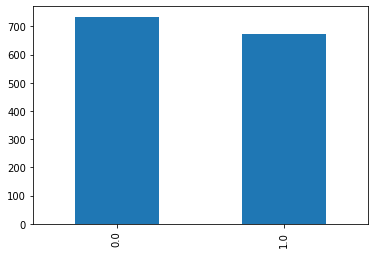

In [30]:
print(y_df.value_counts())
y_df.value_counts().plot.bar()

---

## Standardize

In [31]:
from sklearn.preprocessing import StandardScaler
x_standard_df = pd.DataFrame(StandardScaler().fit_transform(x_df))
x_standard_df.describe().loc[['mean', 'std']].style.format("{:.1f}") # check meand and std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
mean,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# train test split

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard_df, y_df.astype('int'), random_state=816)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1054, 45)
(352, 45)
(1054,)
(352,)


---

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

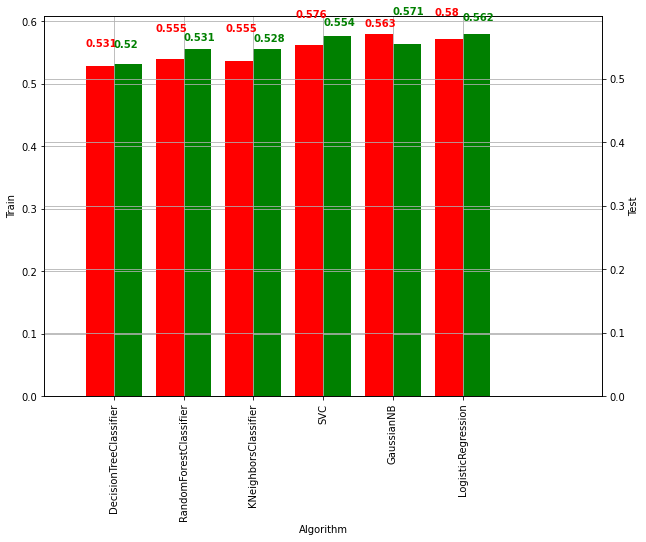

,Algorithm
Score,
0.571023,GaussianNB
0.562500,LogisticRegression
0.553977,SVC
0.531250,RandomForestClassifier
0.528409,KNeighborsClassifier
0.519886,DecisionTreeClassifier


In [35]:
# warnings.filterwarnings('ignore')
# Baseline - comparing model accuracy using all features across classifiers 
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression()
    ]


# Train Accuracy
algo_train = []
scores_train = []
for clf in classifiers:
    algo_train.append(clf.__class__.__name__)
    scores_train.append(cross_val_score(clf, x_standard_df, y_df.astype('int'), cv=5).mean())
# warnings.filterwarnings('ignore')
score_df_Train = pd.DataFrame({'Algorithm': algo_train, 'Score': scores_train}).set_index('Algorithm')


# Test Accuracy
algo_test = []
scores_test = []

for clf in classifiers:
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    algo_test.append(clf.__class__.__name__)
    scores_test.append(accuracy_score(y_test, y_pred))
# warnings.filterwarnings('ignore')
score_df_Test  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test}).set_index('Algorithm')

# Bar plot between Train and Test Accuracy
fig = plt.figure(figsize=(10,7)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .4

score_df_Train.Score.plot(kind='bar',color='green',ax=ax,width=width, position=0)
score_df_Test.Score.plot(kind='bar',color='red', ax=ax2,width = width,position=1)
ax.grid(None, axis='both')
ax2.grid(None)
ax.set_ylabel('Train')
ax2.set_ylabel('Test')
ax.set_xlim(-1,7)

scores_train_round = np.round(scores_train,3)
scores_test_round = np.round(scores_test,3)
for index,data in enumerate(scores_train_round):
    plt.text(x=index-.4 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10), color='red', fontweight='bold')
for index,data in enumerate(scores_test_round):
    plt.text(x=index , y =data+.03 , s=f"{data}" , fontdict=dict(fontsize=10), color='green', fontweight='bold')

plt.show()

# Table
score_df_Test_table  = pd.DataFrame({'Algorithm': algo_test, 'Score': scores_test})
result_df = score_df_Test_table.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


---

In [36]:
import optuna
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2021-11-22 14:32:50,256] A new study created in memory with name: no-name-475cad98-9053-46ac-8ebb-ec7e1cc9c235
[I 2021-11-22 14:32:51,884] Trial 0 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2}. Best is trial 0 with value: 0.9466666666666667.
[I 2021-11-22 14:32:52,336] Trial 1 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 8.30259175644146e-10}. Best is trial 0 with value: 0.9466666666666667.
[I 2021-11-22 14:32:52,353] Trial 2 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 13901995.29854988}. Best is trial 2 with value: 0.96.
[I 2021-11-22 14:32:52,408] Trial 3 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 11}. Best is trial 2 with value: 0.96.
[I 2021-11-22 14:32:52,441] Trial 4 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9}. Best is trial 2 with value: 0.96.
[I 2021-11-

FrozenTrial(number=53, values=[0.9866666666666667], datetime_start=datetime.datetime(2021, 11, 22, 14, 32, 53, 814393), datetime_complete=datetime.datetime(2021, 11, 22, 14, 32, 53, 826650), params={'classifier': 'SVC', 'svc_c': 3.884087686416866}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'svc_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=53, state=TrialState.COMPLETE, value=None)


In [37]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_classifier,params_rf_max_depth,params_svc_c,state
0,0,0.946667,2021-11-22 14:32:50.258090,2021-11-22 14:32:51.883711,0 days 00:00:01.625621,RandomForest,2.0,NaN,COMPLETE
1,1,0.320000,2021-11-22 14:32:51.887322,2021-11-22 14:32:52.336563,0 days 00:00:00.449241,SVC,NaN,8.302592e-10,COMPLETE
2,2,0.960000,2021-11-22 14:32:52.337646,2021-11-22 14:32:52.352562,0 days 00:00:00.014916,SVC,NaN,1.390200e+07,COMPLETE
3,3,0.946667,2021-11-22 14:32:52.353902,2021-11-22 14:32:52.408135,0 days 00:00:00.054233,RandomForest,11.0,NaN,COMPLETE
4,4,0.960000,2021-11-22 14:32:52.409150,2021-11-22 14:32:52.441329,0 days 00:00:00.032179,RandomForest,9.0,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...
95,95,0.960000,2021-11-22 14:32:54.443352,2021-11-22 14:32:54.458347,0 days 00:00:00.014995,SVC,NaN,2.383664e-01,COMPLETE
96,96,0.960000,2021-11-22 14:32:54.459241,2021-11-22 14:32:54.471259,0 days 00:00:00.012018,SVC,NaN,7.896891e+01,COMPLETE
97,97,0.966667,2021-11-22 14:32:54.472128,2021-11-22 14:32:54.484946,0 days 00:00:00.012818,SVC,NaN,1.636694e+00,COMPLETE
98,98,0.986667,2021-11-22 14:32:54.485961,2021-11-22 14:32:54.498917,0 days 00:00:00.012956,SVC,NaN,4.757539e+00,COMPLETE


# Tree based feature selection

In [38]:
# Feature selection using Random Forest Classifier
from sklearn.feature_selection import SelectFromModel
# Bagged decision trees for feature importance- embedded method
Rtree_clf = RandomForestClassifier()
Rtree_clf = Rtree_clf.fit(x_train,y_train)
model = SelectFromModel(Rtree_clf, prefit=True)
RF_tree_featuresTrain = pd.DataFrame(x_train).loc[:, model.get_support()]
RF_tree_featuresTest = pd.DataFrame(x_test).loc[:, model.get_support()]
print(RF_tree_featuresTrain.columns)

Int64Index([0, 1, 2], dtype='int64')


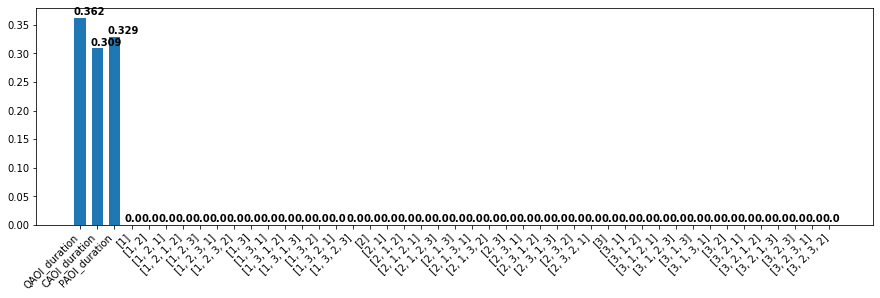

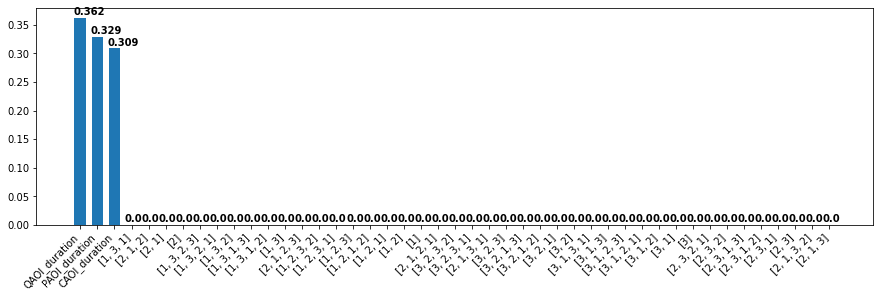

In [39]:
importance = Rtree_clf.feature_importances_
# for i,v in enumerate(importance):
#     print('Feature:', i, x_df.columns[i] , ', Score:', round(v,4))

# plot feature importance
plt.figure(figsize=(15,4))
plt.bar(np.arange(len(importance)), importance,width = 0.7)
plt.xticks(np.arange(len(importance)), x_df.columns, rotation=45,ha='right')
importance_round = np.round(importance,3)
for index,data in enumerate(importance_round):
    plt.text(x=index-.4 , y =data+.005 , s=f"{data}" , fontdict=dict(fontsize=10), color='black', fontweight='bold')
plt.show()


indices = np.argsort(importance)[::-1]
# # Feature Ranking
# for f in range(18):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

importance_sort = importance[np.argsort(importance)[::-1]]

x_column_sort = []
for i in indices:
    x_column_sort.append(x_df.columns[i])

plt.figure(figsize=(15,4))
plt.bar(np.arange(len(importance)), np.array(importance_sort),width = 0.7)
plt.xticks(np.arange(len(importance)),  x_column_sort, rotation=45,ha='right')
importance_sort_round = np.round(importance_sort,3)
for index,data in enumerate(importance_sort_round):
    plt.text(x=index-.4 , y =data+.005 , s=f"{data}" , fontdict=dict(fontsize=10), color='black', fontweight='bold')
plt.show()

# Recursive Feature Elmination¶

Optimal number of features : 3


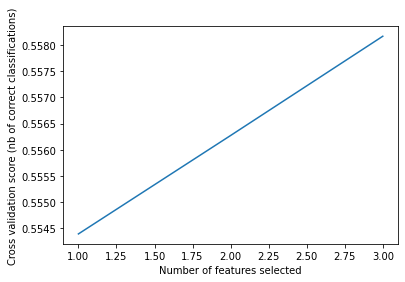

In [32]:
# Applying RFE Cross validation to find number of features
# The "accuracy" scoring is proportional to the number of correct classifications

# Before we apply RFE we need to know the optimal number of features. Hence RFECV crossvalidation technique is used to find 
# the optimal number of features based on the accuracy score in the training set. 

# Applying RFECV with svm classifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

svc=SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), # Stratified fold inorder to reduce bias
              scoring='accuracy')
rfetrain=rfecv.fit(RF_tree_featuresTrain, y_train)
print('Optimal number of features :', rfecv.n_features_)


# Plot showing the Cross Validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
# Applying RFE with optimal number of features
from sklearn.feature_selection import RFE

rfe = RFE(estimator=svc, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(RF_tree_featuresTrain, y_train)

rfe_train=RF_tree_featuresTrain.loc[:, rfe.get_support()]
rfe_test=RF_tree_featuresTest.loc[:, rfe.get_support()]


# Checking the Accuracy after rfe
# Train Accuracy
print("Train Accuracy:",cross_val_score(svc,rfe_train,y_train, cv=5).mean())
# Test Accuracy
scv = svc.fit(rfe_train, y_train)
y_pred = scv.predict(rfe_test)
print("Test Accuracy:",accuracy_score(y_pred, y_test))

Train Accuracy: 0.5629035142627201
Test Accuracy: 0.603399433427762
